<a href="https://colab.research.google.com/github/marcinwolter/Machine-learning-KISD-2022/blob/main/lecture8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>




#**<font color = "red">Introduction to machine learning</font>**

**Lecture 8**


##**<font color = "green">Hyperparameter optimalization and k-folding</font>**

*20 April 2022*


---

*Marcin Wolter, IFJ PAN*

*e-mail: marcin.wolter@ifj.edu.pl*


---
</center>

#<font color='green'>**Program for today:**


* ###  <font color='red'>k-folding - using all data for training
* ###  <font color='red'>Hyperparameter optimalization


<br>


**As always all slides are here:** 

*https://github.com/marcinwolter/Machine-learning-KISD-2022*

<br>




<span style="color:#000000"> __Overtraining__ </span>  <span style="color:#000000"> – algorithm “learns” the particular events\, not the rules\.</span>

<span style="color:#800000"> _This effect appears for all ML algorithms\._ </span>

<span style="color:#000000">Remedy – checking with another\, independent dataset\.</span>




<span style="color:#800000"> __How to train a ML algorithm?__ </span>

* <span style="color:#000000">How to avoid </span>  <span style="color:#000000"> __overtraining__ </span>  <span style="color:#000000"> while learning?</span>

* <span style="color:#000000">We should use one sample for </span>  <span style="color:#000000"> __training__ </span>  <span style="color:#000000"> and another for </span>  <span style="color:#000000"> __validating__ </span>  

* <span style="color:#000000">Then we increase the error – we use just a part of data for training\.</span>

<span style="color:#C9211E"> __Important remark:__ </span>  <span style="color:#000000"> to avoid ovetraining and find the performance of the trained algorithm we should use one more\, </span>  <span style="color:#C9211E"> __third data sample__ </span>  <span style="color:#000000"> to measure the final performance of the ML algorithm\.</span>



<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_85.png' width=450px>




---



---




#<span style="color:#800000"> __Cross\-validation__ </span>

<span style="color:#000000">We have independant training sample $L_n$ and a test sample $T_m$. </span>

<span style="color:#000000">Error level of the classifier                          built on the training sample $L_n$:

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_818.png' width=200px>

**"Standard" procedure:**

* <span style="color:#000000">Estimator using "recycled data" \(the same data for training and for error calculation\) is biased\.</span>

* <span style="color:#000000">Reduction of bias: division of data into two parts \(training & validation\)\. But than we use just a half of information only\.</span>

**Cross\-validation_** 

– out of sample $L_n$ we remove just one event $j$, than train classifier\, validate on single event $j$\. 


<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_819.png' width=250px>

We repeat $n$ times and get the estimator \(an average of all n estimators\): </span>


<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_820.png' width=250px>

<span style="color:#000000">We get an estimator\, which is unbiased \(in the limit of huge $n$\)\, but training is CPU demanding\. </span>




#**Cross\-validation**

<span style="color:#000000">Intermediate solution –</span>   <span style="color:#000000"> **_k\-fold cross\-validation_** </span>

<span style="color:#000000">The sample is divided into $k$ subsamples\, $k-1$ of them we use for training\, the one for validation\. Then the procedure is repeated with other subsamples and the procedure is repeated k times\. </span>

<span style="color:#000000">Smaller CPU usage comparing to the full cross\-validation\.</span>

<span style="color:#000000">Recommended $k \approx 10$ \.</span>

<span style="color:#000000">Resulting classifier might be in the simplest case an average of all k classifiers \(or they might be joined together in another way\) \.</span>







#<span style="color:#800000"> __Model performance__ </span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_824.png' width=450px>

<span style="color:#000000">[https://www\.slideshare\.net/0xdata/top\-10\-data\-science\-practitioner\-pitfalls](https://www.slideshare.net/0xdata/top-10-data-science-practitioner-pitfalls)</span>

#__Train vs Test vs Valid__ </span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_825.png' width=450px>



# **Cross-validation example**
# **Hand-written digits classification with k-folding**

In [8]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 99.6% test accuracy after 40 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.optimizers import RMSprop, Adam, Adadelta
from keras.callbacks import EarlyStopping

from keras.utils.vis_utils import plot_model
from IPython.display import Image 

from sklearn.model_selection import KFold

batch_size = 128
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train0), (x_test, y_test0) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)



x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train0, num_classes)
y_test = keras.utils.to_categorical(y_test0, num_classes)



60000 train samples
10000 test samples


# **Reduce the dataset size**

In [9]:
N_TRAIN_EXAMPLES = 30000 #3000
N_TEST_EXAMPLES = 10000

x_train = x_train[:N_TRAIN_EXAMPLES]
x_test = x_test[:N_TEST_EXAMPLES]
y_train = y_train[:N_TRAIN_EXAMPLES]
y_test = y_test[:N_TEST_EXAMPLES]

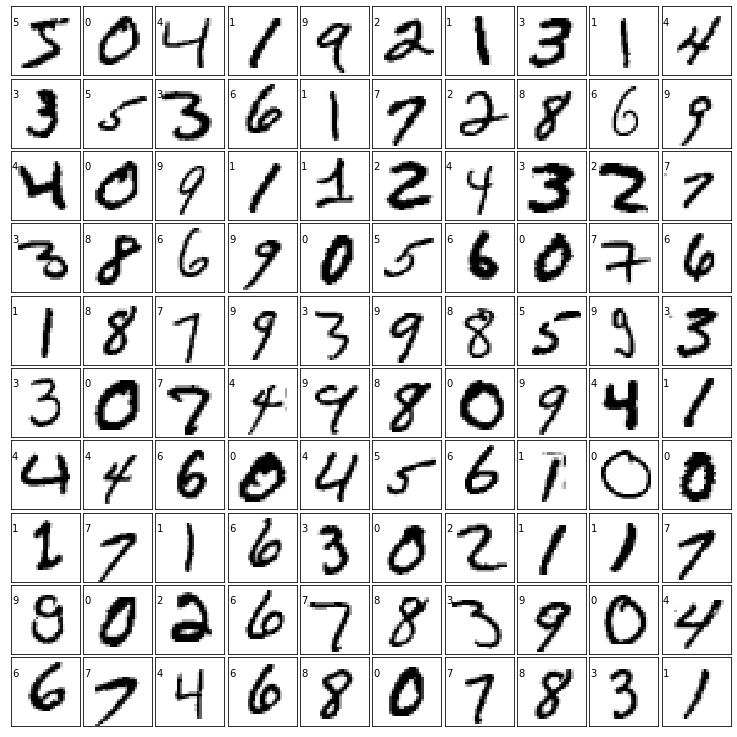

In [10]:
#visualize the digits

fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape(img_rows, img_cols), cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y_train0[i]))

In [11]:
def define_model():
# Our old fully connected (dense) network
#model = Sequential()
#model.add(Dense(512, activation='relu', input_shape=(784,)))
#model.add(Dropout(0.2))
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(num_classes, activation='softmax'))

  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))



  #model.summary()

  return model

In [12]:
def plotModel(model):
  plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
  Image('model_plot.png')

In [13]:
def fit_model(model, x_train, y_train, x_val, y_val):
  model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
  
  es = EarlyStopping(
    monitor="val_loss",
    patience=3,
    verbose=0
  )

  history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val),
                    callbacks=[es])
  return history, model

# **Train with k-folding**
**Here the KFold() from scikit-learn is used**

In [14]:

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):

  # prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  # enumerate splits
  for train_ix, test_ix in kfold.split(dataX):
    # define model
    model = define_model()
    # select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    # fit model
    history, model = fit_model(model, trainX, trainY, testX, testY)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
		# stores scores
    scores.append(acc)
    histories.append(history)
    models.append(model)
  return scores, histories, models

# **Make plots**

In [15]:
 
# plot diagnostic learning curves
def summarize_diagnostics(histories):
  plt.figure(figsize=(10,10))
  for i in range(len(histories)):
		# plot loss
    plt.subplot(2, 1, 1)
    plt.title('Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')
    plt.ylim(0,0.1)
    plt.legend(['loss','val_loss'])
    # plot accuracy
    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.ylim(0.9,1)
    plt.legend(['accuracy','val_accuracy'])
  plt.show()
 
# summarize model performance
def summarize_performance(scores):
	# print summary
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))
	# box and whisker plots of results
  plt.figure(figsize=(10,10))
  plt.boxplot(scores)
  plt.show()

# **Perform training**

In [16]:
	scores, histories, models = list(), list(), list()
  
  # evaluate model
	scores, histories, models = evaluate_model(x_train, y_train, n_folds=10)


Epoch 1/20
211/211 [==============================] - 15s 24ms/step - loss: 0.5072 - accuracy: 0.8350 - val_loss: 0.0886 - val_accuracy: 0.9670
Epoch 2/20
211/211 [==============================] - 5s 22ms/step - loss: 0.1432 - accuracy: 0.9580 - val_loss: 0.0527 - val_accuracy: 0.9820
Epoch 3/20
211/211 [==============================] - 5s 22ms/step - loss: 0.1006 - accuracy: 0.9714 - val_loss: 0.0420 - val_accuracy: 0.9850
Epoch 4/20
211/211 [==============================] - 4s 21ms/step - loss: 0.0772 - accuracy: 0.9760 - val_loss: 0.0373 - val_accuracy: 0.9883
Epoch 5/20
211/211 [==============================] - 5s 21ms/step - loss: 0.0632 - accuracy: 0.9809 - val_loss: 0.0344 - val_accuracy: 0.9873
Epoch 6/20
211/211 [==============================] - 5s 21ms/step - loss: 0.0549 - accuracy: 0.9828 - val_loss: 0.0332 - val_accuracy: 0.9863
Epoch 7/20
211/211 [==============================] - 4s 21ms/step - loss: 0.0474 - accuracy: 0.9862 - val_loss: 0.0279 - val_accuracy: 0.990

# **Summarize**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


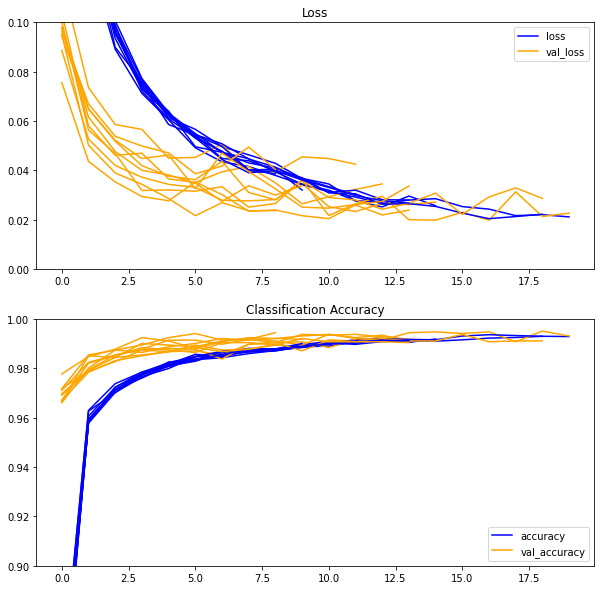

Accuracy: mean=99.167 std=0.129, n=10


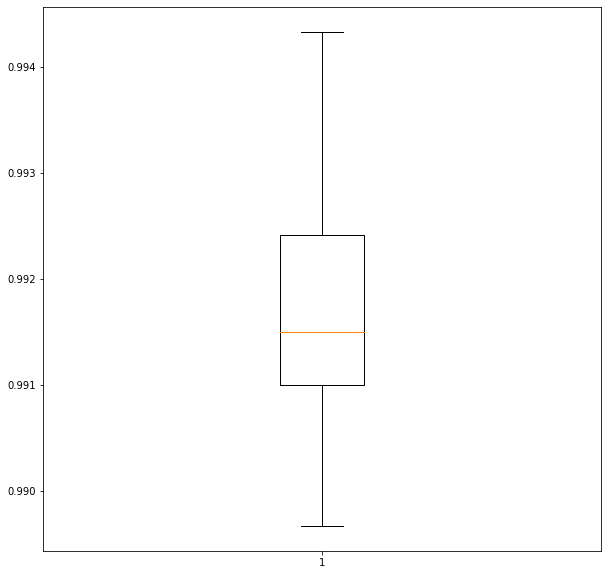

Scores:  [0.9913333058357239, 0.9909999966621399, 0.9916666746139526, 0.9926666617393494, 0.9943333268165588, 0.9929999709129333, 0.9916666746139526, 0.9909999966621399, 0.9896666407585144, 0.9903333187103271]


In [17]:
# learning curves
summarize_diagnostics(histories)
# summarize estimated performance
summarize_performance(scores)
 
print("Scores: ",scores)

# **Ensamble of networks**

In [18]:
results = np.zeros(y_test.shape)
for j in range(len(models)):
    results = results + models[j].predict(x_test)

results = results / len(models)
results = np.argmax(results,axis = 1)
Yresults = np.argmax(y_test,axis = 1)

#print(results.shape)


score = (len(results) - np.count_nonzero(results-Yresults))/len(results)

print("Ensamble test accuracy: ",score*100.,"%")


Ensamble test accuracy:  99.46000000000001 %


In [19]:
# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix


#confusion matrix
cm = confusion_matrix(Yresults,results)
print(cm)



[[ 977    0    0    0    0    0    2    1    0    0]
 [   0 1133    0    1    0    0    0    1    0    0]
 [   1    0 1029    0    0    0    0    2    0    0]
 [   0    0    1 1006    0    2    0    0    1    0]
 [   0    0    0    0  978    0    1    0    0    3]
 [   0    0    0    4    0  886    1    1    0    0]
 [   3    3    0    0    1    1  950    0    0    0]
 [   0    2    4    0    0    0    0 1020    0    2]
 [   2    0    2    0    0    0    0    0  969    1]
 [   0    0    0    0    4    3    0    3    1  998]]


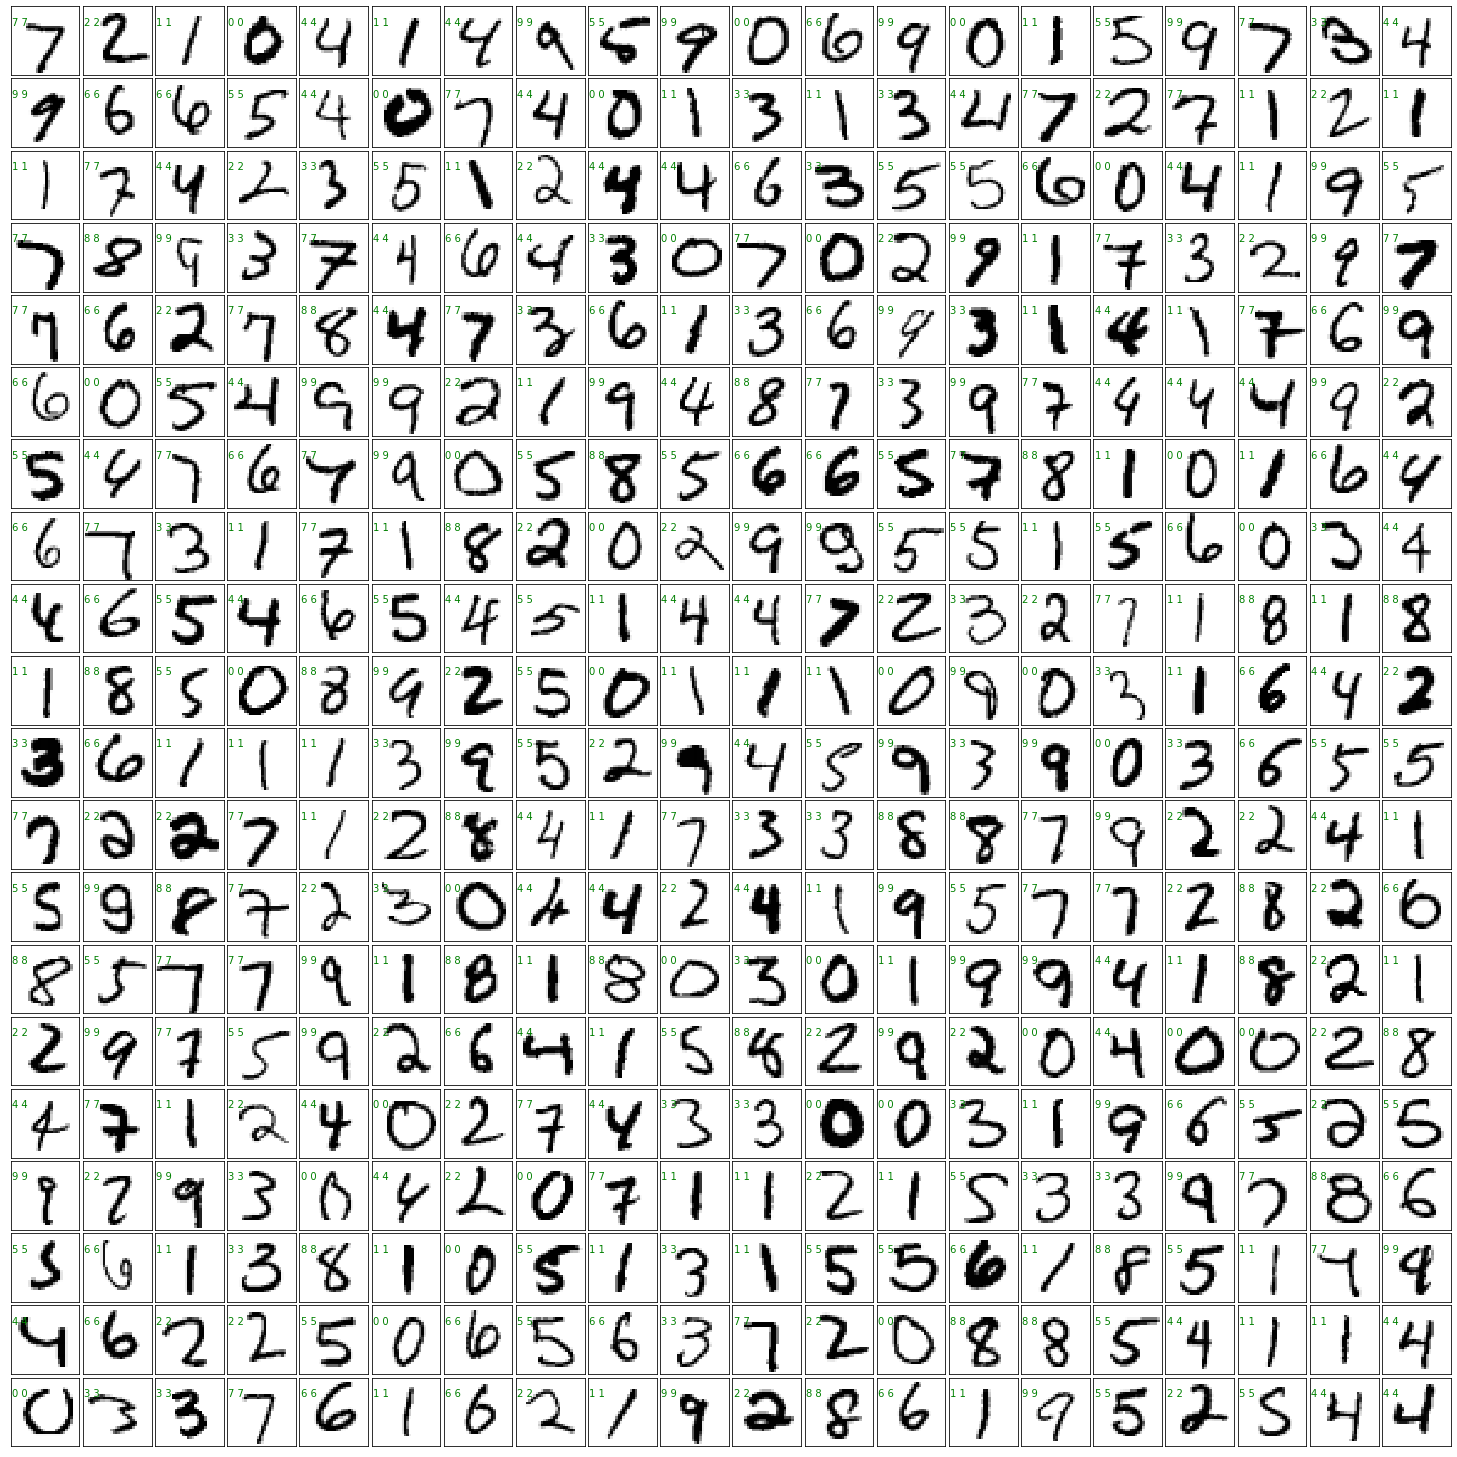

In [20]:
# use the model to predict the labels of the test data
predicted = results
expected = Yresults

#print(predicted.shape, expected.shape)

# Plot the prediction
fig = plt.figure(figsize=(20, 20))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


# plot the digits: each image is 28x28 pixels
for i in range(400):
    ax = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[i].reshape(img_rows, img_cols), cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
         ax.text(0,7,str(expected[i])+" "+str(predicted[i]), color='green')
    else:
         ax.text(0,7,str(expected[i])+" "+str(predicted[i]), color='red')



---

#<font color='green'>**Hyperparameter optimization**

<span style="color:#C9211E">How to </span>  <span style="color:#C9211E"> __optimize the hyperparameters__ </span>  <span style="color:#C9211E"> of the ML algorithm \(number of trees and their depth for BDT\, number of hidden layers\, nodes for Neural Network\)?</span>

* <span style="color:#000000">Nearly each ML method has few hyperparameters \(structure of the Neural Net\, number of trees and their depth for BDT etc\)\.</span>
* <span style="color:#000000">They should be optimized for a given problem\.</span>
* <span style="color:#800000"> __Task: for a given data sample find a set of hyperparameters\, that the estimated error of the given method is minimized\.__ </span>
* <span style="color:#000000">Looks like a typical minimization problem \(fitting like\)\, but:</span>
  * <span style="color:#000000">Getting each measurement is costly</span>
  * <span style="color:#000000">High noise</span>
  * <span style="color:#000000">We can get the value of the minimized function \(so our error\) in the pont </span>  <span style="color:#000000"> __x__ </span>  <span style="color:#000000"> of the hyperparameter space\,  but we can't get the differential easily\.</span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_86.png' width=450px>



<span style="color:#800000"> __How does it work in practice?__ </span>

<span style="color:#000000">Straight line fitting:</span>

$$y(x, w) = w_0+ w_1 x$$ 

* <span style="color:#000000">Gaussian prior\, no data used</span>

* <span style="color:#000000">First data point\. We find the likelihood based on this point \(left plot\) and multiply: $prior*likelihood$. We get the posterior distribution \(right plot\)\.</span>

* <span style="color:#000000">We add the second point and repeat the procedure\.</span>

* <span style="color:#000000">Adding all the points one by one\.</span>

---




#<font color='green'>**Optimization of hyperparameters**

* <span style="color:#000000">How to optimize:</span>
  * <span style="color:#000000">**"Grid search”** \- scan over all possible values of parameters\. </span>
  * **"Random search”**
  * <span style="color:#000000">Some type of fitting…</span>
* <span style="color:#000000">Popular method of fitting is the </span>  <span style="color:#000000"> __"bayesian optimization”:__ </span>
  * <span style="color:#000000">Build the probability model</span>
  * <span style="color:#000000">Take „a priori” distributions of parameters</span>
  * <span style="color:#000000">Find\, for which point in the hyperparameter space you can maximally improve your model</span>
  * <span style="color:#000000">Find the value of error</span>
  * <span style="color:#000000">Find the „a posteriori” probability distribution</span>
  * <span style="color:#000000">Repeat</span>


#<font color='green'> **Bayesian optimization**


<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_87.png' width=450px>

<span style="color:#CE181E"> __We are searching for a MAXIMUM__ </span>

Unknown function \(with noise\)\, four observations\.

Where should we do the next costly probing?

*Plots from:
[https://www\.iro\.umontreal\.ca/~bengioy/cifar/NCAP2014\-summerschool/slides/Ryan\_adams\_140814\_bayesopt\_ncap\.pdf](https://www.iro.umontreal.ca/~bengioy/cifar/NCAP2014-summerschool/slides/Ryan_adams_140814_bayesopt_ncap.pdf)*




<span style="color:#800000"> __A posteriori distribution__ </span>

A set of functions

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_88.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_89.png' width=450px>

The a posteriori distribution of possible functions\, those functions could generate the observed data points\.



<span style="color:#800000"> __A posteriori functions  – Gaussian Processes \(GP\)__ </span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_810.png' width=450px>

These functions should be somehow parametrized\, for example they could be Gaussian functions\.

<span style="color:#800000"> __Acquisition function__ </span>

* <span style="color:#000000">Posterior GP \(Gaussian Processes\) give us the mean of GP functions </span>  <span style="color:#000000">μ</span>  <span style="color:#000000">\(x\) and their expected variation</span>  <span style="color:#000000"> </span>  $\sigma^2(x)$.</span>
  * <span style="color:#000000"> __Exploration__ </span>  <span style="color:#000000"> – searching for huge variation</span>
  * <span style="color:#000000"> __Exploitation__ </span>  <span style="color:#000000"> – searching for a smallest/greatest \(depends on sign and convention\) value of mean  </span>  <span style="color:#000000">μ</span>  <span style="color:#000000">\(x\)</span>
* <span style="color:#000000">The acquisition policy has to balance these two approaches</span>

<span style="color:#800000"> __Where to put the next point?__ </span>

<span style="color:#000000">Our next chosen point\( x \) should has high mean \(exploitation\) & high variance \(exploration\)\.</span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_811.png' width=450px>

<span style="color:#800000"> __We choose next x__ </span>

u\(x\) – acqusition function \(finding maximum\)

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_812.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_813.png' width=450px>

We probe once more and repeat the procedure\.\.\.

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_814.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_815.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_816.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_817.png' width=450px>



* <span style="color:#000000">Bayesian optimization depends on the parameters chosen</span>
* <span style="color:#000000">On the acquisition function</span>
* <span style="color:#000000">On the prior selected\.\.\.\.</span>
* <span style="color:#000000">It’s </span>  <span style="color:#000000"> __sequential\.__ </span>

---




#<font color='green'>**Implementations of hyperparameter tuning**

  * <span style="color:#000000">Tree of Parzen Estimators \(TPE\) used by the HyperOpt package </span>  <span style="color:#B84700">[https://github\.com/hyperopt/hyperopt](https://github.com/hyperopt/hyperopt)</span>  <span style="color:#000000">\)\.</span>
  * <span style="color:#000000">OPTUNA package [https://optuna\.org/](https://optuna.org/) Quite advanced\, grid search\, random sampling\,TPE and Covariance Matrix Adaptation Evolution Strategy CMA\-ES algorithms</span>
  * keras tuner *https://www.tensorflow.org/tutorials/keras/keras_tuner* (RandomSearch,
BayesianOptimization,
Hyperband,
Sklearn Tuner)
  * <span style="color:#000000">Many more packages\.\.\.</span>

---

__Nice OPTUNA vs\. HYPEROPT comparison:__

__[https://neptune\.ai/blog/optuna\-vs\-hyperopt](https://neptune.ai/blog/optuna-vs-hyperopt)__ 



# **<span style="color:#000000">Simple example with HYPEROPT**




In [1]:
#Hyperopt demo - minimize x^2 function

from hyperopt import fmin, tpe, rand, hp, STATUS_OK, Trials, plotting
import matplotlib.pyplot as plt

fspace = {
    'x': hp.uniform('x', -5, 5)
}

def f(params):
    x = params['x']
    val = x**2
    return {'loss': val, 'status': STATUS_OK}
    
trials = Trials()

# possible algos: algo= (tpe.suggest, rand.suggest, )
best = fmin(fn=f, space=fspace, algo=tpe.suggest,  max_evals=1000, trials=trials)
print('best:', best)
print(' trials:')

#for trial in trials.trials[:2]:
#    print(trial)




100%|██████████| 1000/1000 [00:06<00:00, 152.73it/s, best loss: 1.6985344560643582e-06]
best: {'x': 0.0013032783494190173}
 trials:


In [41]:
#print(trials.trials)

avg best error: 1.6985344560643582e-06


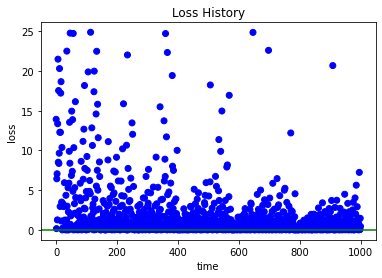

In [2]:
plotting.main_plot_history(trials)

Showing Histogram of 1000 jobs


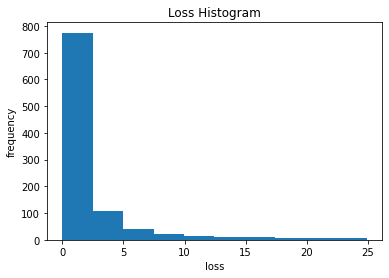

In [3]:
plotting.main_plot_histogram(trials)

finite loss range 1.6985344560643582e-06 24.886523842337247 -0.9999983014655439


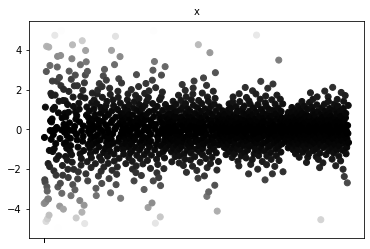

In [4]:
plotting.main_plot_vars(trials)

Text(0, 0.5, '$x$')

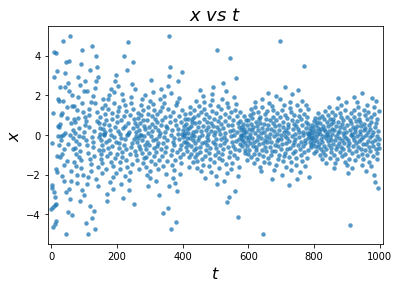

In [5]:
f, ax = plt.subplots(1)

xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['x'] for t in trials.trials]

ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$x$ $vs$ $t$ ', fontsize=18)
ax.set_xlabel('$t$', fontsize=16)
ax.set_ylabel('$x$', fontsize=16)

Text(0, 0.5, '$val$')

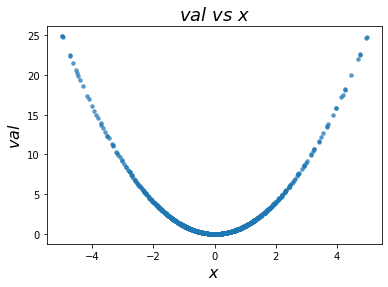

In [6]:
f, ax = plt.subplots(1)

xs = [t['misc']['vals']['x'] for t in trials.trials]
ys = [t['result']['loss'] for t in trials.trials]

ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$val$ $vs$ $x$ ', fontsize=18)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$val$', fontsize=16)

# **Optuna demo**

In [ ]:
# install optuna
! pip install optuna

     |████████████████████████████████| 308 kB 4.4 MB/s 
     |████████████████████████████████| 81 kB 6.0 MB/s 
     |████████████████████████████████| 210 kB 38.3 MB/s 
     |████████████████████████████████| 78 kB 5.8 MB/s 
     |████████████████████████████████| 49 kB 2.5 MB/s 
     |████████████████████████████████| 146 kB 42.0 MB/s 
     |████████████████████████████████| 113 kB 35.7 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=70a493bae94a3e59ad4519cef5ce8db2465dd3bffcf615d3315c85cfdae54a84
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [13]:

! pip install optuna
import optuna

def objective(trial):
    x = trial.suggest_uniform('x', -10, 10)
    y = trial.suggest_uniform('y', -10, 10)



    return (x - 2) ** 2 + (y-1) ** 2


study = optuna.create_study(direction='minimize', pruner=optuna.pruners.MedianPruner(), sampler=optuna.samplers.TPESampler() )

study.optimize(objective, n_trials=200)

study.best_params  # E.g. {'x': 2.0912375440412942, 'y': 1.0091490823506173}

[I 2022-04-20 10:46:25,547] A new study created in memory with name: no-name-466a1175-663f-46f4-9272-ea05d2b11bdb
[I 2022-04-20 10:46:25,558] Trial 0 finished with value: 32.76832177553508 and parameters: {'x': -0.7626071311172744, 'y': -4.01361382783268}. Best is trial 0 with value: 32.76832177553508.
[I 2022-04-20 10:46:25,563] Trial 1 finished with value: 33.53237666338232 and parameters: {'x': 7.576951908170162, 'y': -0.5588406196078903}. Best is trial 0 with value: 32.76832177553508.
[I 2022-04-20 10:46:25,568] Trial 2 finished with value: 89.55220680820285 and parameters: {'x': 5.422781536865603, 'y': -7.822515137935144}. Best is trial 0 with value: 32.76832177553508.
[I 2022-04-20 10:46:25,574] Trial 3 finished with value: 65.69965196105774 and parameters: {'x': -5.501158546929905, 'y': 4.0712004843184975}. Best is trial 0 with value: 32.76832177553508.
[I 2022-04-20 10:46:25,579] Trial 4 finished with value: 42.19142899701204 and parameters: {'x': -2.185445531155768, 'y': 5.967

{'x': 1.9011601626215404, 'y': 1.0674806216220891}

## Visualizing the Optimization History

In [14]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study)

## Visualizing High-dimensional Parameter Relationships

In [15]:
from optuna.visualization import plot_parallel_coordinate

plot_parallel_coordinate(study, params=['x', 'y'])

## Visualizing Parameter Relationships

In [16]:
from optuna.visualization import plot_contour

plot_contour(study)

### Selecting Parameters to Visualize

In [ ]:
plot_contour(study, params=['x', 'y'])

## Visualizing Individual Parameters

In [ ]:
from optuna.visualization import plot_slice

plot_slice(study)

### Selecting Parameters to Visualize

In [ ]:
plot_slice(study, params=['x', 'y'])

## Visualizing Parameter Importances

In [ ]:
from optuna.visualization import plot_param_importances

plot_param_importances(study)

#<font color='green'>**Examples of optimalization of hand written digits classification using hyperopt, optuna and keras tuner** 

#<font color='red'>**MNIST hyperopt optimalization**

In [1]:
'''Trains a simple deep NN on the MNIST dataset.


'''

from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20

N_TRAIN_EXAMPLES = 3000
N_TEST_EXAMPLES = 1000

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# print info about a shape of arrays
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')
print(y_train.shape, 'train samples')
print(y_test.shape, 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test  = tf.keras.utils.to_categorical(y_test, num_classes)


# take a subset of all MNIST events
x_train = x_train[:N_TRAIN_EXAMPLES]
y_train = y_train[:N_TRAIN_EXAMPLES]
x_test = x_test[:N_TEST_EXAMPLES]
y_test = y_test[:N_TEST_EXAMPLES]

# print info about a shape of arrays
print(x_train.shape, 'train samples after conversion')
print(x_test.shape, 'test samples  after conversion')
print(y_train.shape, 'train samples after conversion')
print(y_test.shape, 'test samples  after conversion')


11501568/11490434 [==============================] - 0s 0us/step
(60000, 784) train samples
(10000, 784) test samples
(60000,) train samples
(10000,) test samples
(3000, 784) train samples after conversion
(1000, 784) test samples  after conversion
(3000, 10) train samples after conversion
(1000, 10) test samples  after conversion


In [2]:
space = {

            'units1': hp.quniform('units1', 32,3*1024,32),
            'dropout1': hp.uniform('dropout1', .00,.50),

        }

In [3]:
def f_nn(params):   

    #print ('Parameters testing: ', params)

    model = Sequential()
    model.add(Dense(int(params['units1']), activation='relu', input_shape=(784,)))
    model.add(Dropout(params['dropout1']))
    model.add(Dense(int(params['units1']), activation='relu'))
    model.add(Dropout(params['dropout1']))
    model.add(Dense(int(params['units1']), activation='relu'))
    model.add(Dropout(params['dropout1']))
    model.add(Dense(num_classes, activation='softmax'))

    #model.summary()

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test))
    
    score = model.evaluate(x_test, y_test, verbose=0)
    #print('Test accuracy:', score[1])
    # return 'accuracy'
    return {'loss': -score[1], 'status': STATUS_OK}



# **Find the best parameters:**

In [4]:

trials = Trials()
best = fmin(fn=f_nn, space=space, algo=tpe.suggest, max_evals=50, trials=trials)



100%|██████████| 50/50 [11:45<00:00, 14.10s/it, best loss: -0.9430000185966492]


In [15]:
print('best: ', best)
print('best accuracy: ',-trials.best_trial['result']['loss'])

#from hyperopt import space_eval
#print('best parameters: ',space_eval(space, best))

best:  {'dropout1': 0.33243721717919766, 'units1': 2144.0}
best accuracy:  0.9430000185966492


# **Visualization**

In [16]:
print(trials.trials)

[{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': -0.9229999780654907, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'dropout1': [0], 'units1': [0]}, 'vals': {'dropout1': [0.20227066370825258], 'units1': [224.0]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 19, 21, 13, 12, 214000), 'refresh_time': datetime.datetime(2022, 4, 19, 21, 13, 28, 910000)}, {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': -0.9330000281333923, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'dropout1': [1], 'units1': [1]}, 'vals': {'dropout1': [0.1853121351959024], 'units1': [384.0]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 4, 19, 21, 13, 28, 918000), 'refresh_time': datetime.datetime(2022, 4, 19, 21, 13, 33, 481000)}, {'state': 2, 'tid': 2, 'spec': None, 'result': {'loss': -0.899999976

avg best error: -0.9430000185966492


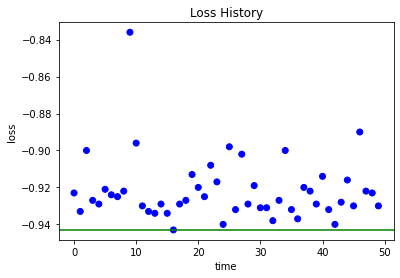

In [18]:
from hyperopt import plotting

plotting.main_plot_history(trials)

Showing Histogram of 50 jobs


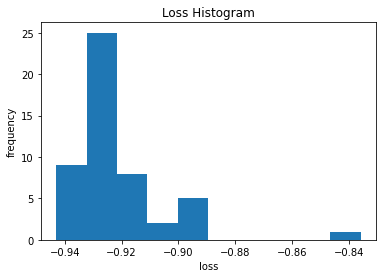

In [19]:
plotting.main_plot_histogram(trials)

finite loss range -0.9430000185966492 -0.8360000252723694 -1.9430000185966492


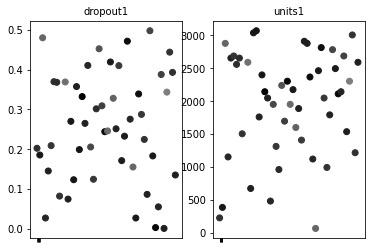

In [21]:
plotting.main_plot_vars(trials)

Text(0, 0.5, '$units$')

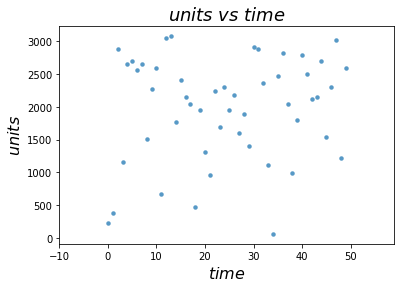

In [20]:
#units vs time

f, ax = plt.subplots(1)
xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['units1'] for t in trials.trials]
ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$units$ $vs$ $time$ ', fontsize=18)
ax.set_xlabel('$time$', fontsize=16)
ax.set_ylabel('$units$', fontsize=16)

Text(0, 0.5, '$dropout$')

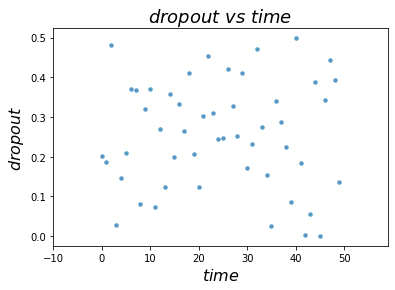

In [11]:
#units vs time

f, ax = plt.subplots(1)
xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['dropout1'] for t in trials.trials]
ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$dropout$ $vs$ $time$ ', fontsize=18)
ax.set_xlabel('$time$', fontsize=16)
ax.set_ylabel('$dropout$', fontsize=16)

Text(0, 0.5, '$dropout$')

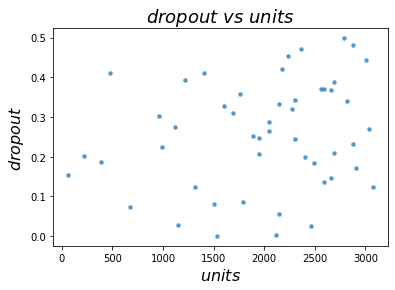

In [12]:
#dropout vs units

f, ax = plt.subplots(1)
xs = [t['misc']['vals']['units1'] for t in trials.trials]
ys = [t['misc']['vals']['dropout1'] for t in trials.trials]
#ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$dropout$ $vs$ $units$ ', fontsize=18)
ax.set_xlabel('$units$', fontsize=16)
ax.set_ylabel('$dropout$', fontsize=16)

Text(0, 0.5, '$accuracy$')

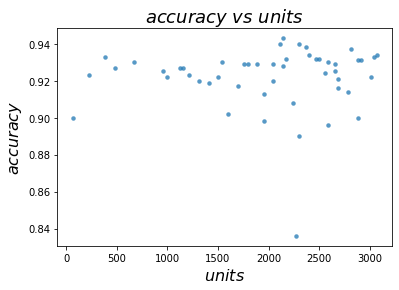

In [13]:
#value vs units

f, ax = plt.subplots(1)
xs = [t['misc']['vals']['units1'] for t in trials.trials]
ys = [-t['result']['loss'] for t in trials.trials]
#ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$accuracy$ $vs$ $units$ ', fontsize=18)
ax.set_xlabel('$units$', fontsize=16)
ax.set_ylabel('$accuracy$', fontsize=16)



Text(0, 0.5, '$accuracy$')

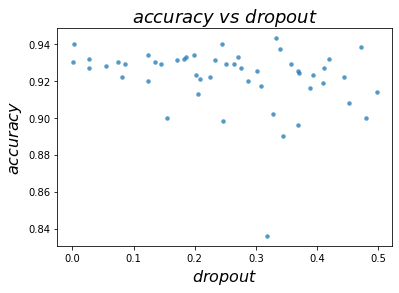

In [14]:
#value vs dropout

f, ax = plt.subplots(1)
xs = [t['misc']['vals']['dropout1'] for t in trials.trials]
ys = [-t['result']['loss'] for t in trials.trials]
#ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$accuracy$ $vs$ $dropout$ ', fontsize=18)
ax.set_xlabel('$dropout$', fontsize=16)
ax.set_ylabel('$accuracy$', fontsize=16)



#<font color='red'>**Optuna MNIST optimalization**

In [22]:
"""
Optuna example that optimizes a neural network classifier configuration for the
MNIST dataset using Keras.
In this example, we optimize the validation accuracy of MNIST classification using
Keras. We optimize the filter and kernel size, kernel stride and layer activation.
"""
! pip install optuna

import warnings

from keras.backend import clear_session
from keras.datasets import mnist
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

import optuna

     |████████████████████████████████| 308 kB 5.2 MB/s 
     |████████████████████████████████| 210 kB 46.5 MB/s 
     |████████████████████████████████| 81 kB 8.4 MB/s 
     |████████████████████████████████| 78 kB 6.4 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 146 kB 49.2 MB/s 
     |████████████████████████████████| 113 kB 51.3 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=c8e8b2b61d223a4ecae1b68805a850479608043dbed6069e144e042d8bb9073b
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [23]:

N_TRAIN_EXAMPLES = 3000
N_VALID_EXAMPLES = 1000
BATCHSIZE = 128
CLASSES = 10
EPOCHS = 20


In [24]:


(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

x_train = x_train.reshape(60000, 784)[:N_TRAIN_EXAMPLES].astype("float32") / 255
x_valid = x_valid.reshape(10000, 784)[:N_VALID_EXAMPLES].astype("float32") / 255
y_train = y_train[:N_TRAIN_EXAMPLES]
y_valid = y_valid[:N_VALID_EXAMPLES]

In [27]:
def objective(trial):

    # Clear clutter from previous Keras session graphs.
    clear_session() 

    units = int(trial.suggest_discrete_uniform("units1", 32,3*1024,32))
    dropout = trial.suggest_uniform('dropout1', .00,.50)
    act = trial.suggest_categorical('activation', ['relu','sigmoid','linear'])
    lr = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)

    model = Sequential()
    model.add(Dense(units, activation=act, input_shape=(784,)))
    model.add(Dropout(dropout))
    model.add(Dense(units, activation=act))
    model.add(Dropout(dropout))
    model.add(Dense(units, activation=act))
    model.add(Dropout(dropout))

    model.add(Dense(CLASSES, activation="softmax"))

    # We compile our model with a sampled learning rate.
    model.compile(
        loss="sparse_categorical_crossentropy", optimizer=RMSprop(learning_rate=lr), metrics=["accuracy"]
    )

    model.fit(
        x_train,
        y_train,
        validation_data=(x_valid, y_valid),
        shuffle=True,
        batch_size=BATCHSIZE,
        epochs=epochs,
        verbose=False,
    )

    # Evaluate the model accuracy on the validation set.
    score = model.evaluate(x_valid, y_valid, verbose=0)
    return score[1]


# Find the best parameters

In [28]:

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)


[I 2022-04-19 21:31:17,225] A new study created in memory with name: no-name-3bc5b41f-2a46-4dcd-98e1-a77ef823bb6e
[I 2022-04-19 21:31:22,349] Trial 0 finished with value: 0.8149999976158142 and parameters: {'units1': 608.0, 'dropout1': 0.3685612792801564, 'activation': 'relu', 'learning_rate': 0.019104906299094487}. Best is trial 0 with value: 0.8149999976158142.
[I 2022-04-19 21:31:28,448] Trial 1 finished with value: 0.08900000154972076 and parameters: {'units1': 64.0, 'dropout1': 0.11620374576746906, 'activation': 'sigmoid', 'learning_rate': 1.1315948394785695e-05}. Best is trial 0 with value: 0.8149999976158142.
[I 2022-04-19 21:31:33,229] Trial 2 finished with value: 0.9190000295639038 and parameters: {'units1': 544.0, 'dropout1': 0.45424641220880263, 'activation': 'sigmoid', 'learning_rate': 0.00974299648878673}. Best is trial 2 with value: 0.9190000295639038.
[I 2022-04-19 21:31:39,342] Trial 3 finished with value: 0.8209999799728394 and parameters: {'units1': 128.0, 'dropout1':

In [30]:

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.9350000023841858
  Params: 
    units1: 320.0
    dropout1: 0.3894144233757043
    activation: relu
    learning_rate: 0.00140698197385537


## Visualizing the Optimization History

In [31]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study)

## Visualizing High-dimensional Parameter Relationships

In [32]:
from optuna.visualization import plot_parallel_coordinate

plot_parallel_coordinate(study)

## Visualizing Parameter Relationships

In [33]:
from optuna.visualization import plot_contour

plot_contour(study)

### Selecting Parameters to Visualize

In [35]:
plot_contour(study, params=['units1', 'dropout1', 'learning_rate'])

## Visualizing Individual Parameters

In [36]:
from optuna.visualization import plot_slice

plot_slice(study)

### Selecting Parameters to Visualize

In [37]:
plot_slice(study, params=['units1', 'dropout1'])

## Visualizing Parameter Importances

In [38]:
from optuna.visualization import plot_param_importances

plot_param_importances(study)

#<font color='red'>**Keras tuner MNIST optimalization**

In [ ]:
"""
Keras tuner example that optimizes a neural network classifier configuration for the
MNIST dataset using Keras.
"""

! pip install keras_tuner

import warnings

from keras.backend import clear_session
from keras.datasets import mnist
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

import keras_tuner as kt

     |████████████████████████████████| 133 kB 4.2 MB/s 


In [ ]:

N_TRAIN_EXAMPLES = 3000
N_VALID_EXAMPLES = 1000
BATCHSIZE = 128
CLASSES = 10
EPOCHS = 20


#**Read MNIST data**

In [ ]:
# Clear clutter from previous Keras session graphs.
clear_session()

(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

x_train = x_train.reshape(60000, 784)[:N_TRAIN_EXAMPLES].astype("float32") / 255
x_valid = x_valid.reshape(10000, 784)[:N_VALID_EXAMPLES].astype("float32") / 255
y_train = y_train[:N_TRAIN_EXAMPLES]
y_valid = y_valid[:N_VALID_EXAMPLES]
    


11501568/11490434 [==============================] - 0s 0us/step


#**Build model depending on hyperparameters *kt.HyperParameters()***

In [ ]:
'''
    # This are parameters optimized by optuna, we do the same below
    units = int(trial.suggest_discrete_uniform("units1", 32,1024,1))
    dropout = trial.suggest_uniform('dropout1', .00,.50)
    act = trial.suggest_categorical('activation', ['relu','sigmoid','linear'])
    lr = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
'''

def build_model(hp):

    units=hp.Int("units", min_value=32, max_value=3*1024, step=32)
    dropout=hp.Float('dropout', 0.00, 0.50)
    act=hp.Choice('activation', ['relu','sigmoid','linear'])
    lr = hp.Float("learning_rate", 1e-5, 1e-1, sampling='log')

    model = Sequential()
    model.add(Dense(units=units, activation=act, input_shape=(784,)))
    model.add(Dropout(rate=dropout))
    model.add(Dense(units=units, activation=act))
    model.add(Dropout(rate=dropout))
    model.add(Dense(units=units, activation=act))
    model.add(Dropout(rate=dropout))

    model.add(Dense(CLASSES, activation="softmax"))

    # We compile our model with a sampled learning rate.
    model.compile(
        loss="sparse_categorical_crossentropy", optimizer=RMSprop(learning_rate=lr), metrics=["accuracy"]
    )

    return model

build_model(kt.HyperParameters())



#**Prepare the search space**

In [ ]:
#select a tuner class to run the search. You may choose from RandomSearch, BayesianOptimization
# and Hyperband, which correspond to different tuning algorithms.

tuner = kt.BayesianOptimization(
    hypermodel = build_model,
    objective="val_accuracy",
    max_trials=60
)

tuner.search_space_summary()


Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1024, 'step': 32, 'sampling': None}
dropout (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': None, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'linear'], 'ordered': False}
learning_rate (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.1, 'step': None, 'sampling': 'log'}


# **Find the best parameters**

In [ ]:
epochs=20
tuner.search(x_train, y_train, epochs=epochs, validation_data=(x_valid, y_valid))



Trial 60 Complete [00h 00m 21s]
val_accuracy: 0.8809999823570251

Best val_accuracy So Far: 0.9359999895095825
Total elapsed time: 00h 24m 35s
INFO:tensorflow:Oracle triggered exit


#**Get best model**

In [ ]:
# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
# Build the model.
best_model.build()
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

# Print a summary of the 10 best search results

In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units: 1024
dropout: 0.0
activation: relu
learning_rate: 0.0022047098800917204
Score: 0.9359999895095825
Trial summary
Hyperparameters:
units: 1024
dropout: 0.0
activation: relu
learning_rate: 8.637107962335968e-05
Score: 0.9210000038146973
Trial summary
Hyperparameters:
units: 1024
dropout: 0.0
activation: sigmoid
learning_rate: 0.000704634575243425
Score: 0.8999999761581421
Trial summary
Hyperparameters:
units: 1024
dropout: 0.0
activation: relu
learning_rate: 1e-05
Score: 0.8980000019073486
Trial summary
Hyperparameters:
units: 1024
dropout: 0.17080203350083373
activation: linear
learning_rate: 1e-05
Score: 0.8899999856948853
Trial summary
Hyperparameters:
units: 1024
dropout: 0.17638844536335724
activation: linear
learning_rate: 1e-05
Score: 0.8899999856948853
Trial summary
Hyperparameters:
units: 1024
dropout: 0.17703661175346255
activation: linear
learning_rate: 1e-05
Score: 0.8899



---



---



---



#<font color='green'>**Summary**

<span style="color:#000000"> __We have learned today how to optimize the hyperparameters\!__ </span>


<font color='red'>**Next and the last lecture:<br>
generative neural networks GANs.**




#**Bibliography:**

<span style="color:#000000">Brochu\, E\.\, Cora\, V\. M\.\, and De Freitas\, N\. \(2010\)\. A tutorial on bayesian optimization of expensive cost functions\, with application to active user modeling and hierarchical reinforcement learning\. arXiv preprint arXiv:1012\.2599\.</span>

<span style="color:#000000">Shahriari\, B\.\, Swersky\, K\.\, Wang\, Z\.\, Adams\, R\. P\.\, and de Freitas\, N\. \(2016\)\. Taking the human out of the loop: A review of bayesian optimization\. Proceedings of the IEEE\, 104\(1\):148–175\.</span>

<span style="color:#000000">**Nice tutorial:**</span>

<span style="color:#000000">[https://www\.iro\.umontreal\.ca/~bengioy/cifar/NCAP2014\-summerschool/slides/Ryan\_adams\_140814\_bayesopt\_ncap\.pdf](https://www.iro.umontreal.ca/~bengioy/cifar/NCAP2014-summerschool/slides/Ryan_adams_140814_bayesopt_ncap.pdf)</span>
